In [1]:
# import the packages

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(color_codes = True)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,\
                            precision_score,\
                            recall_score,\
                            f1_score,\
                            classification_report,\
                            roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [11]:
# Read the data
data = pd.read_csv('Preprocessed_data.csv')
data

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,...,1,1,1,65.60,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,...,0,0,1,-4.00,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,...,0,1,0,73.90,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,...,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,...,0,1,1,83.90,267.40,0.00,0,22.14,289.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,0,53,0,0,36.807595,-118.901544,0,1,5,42.09,...,0,1,1,70.15,70.15,0.00,0,42.09,112.24,0
4831,0,20,0,0,32.759327,-116.997260,0,13,4,46.68,...,1,0,1,55.15,742.90,0.00,0,606.84,1349.74,1
4832,1,40,1,0,37.734971,-120.954271,1,22,4,16.20,...,0,1,0,85.10,1873.70,0.00,0,356.40,2230.10,0
4833,1,22,0,0,39.108252,-123.645121,0,2,5,18.62,...,0,1,1,50.30,92.75,0.00,0,37.24,129.99,1


In [12]:
# data divided into two part
X = data.drop('Customer Status', axis = 1)
y = data['Customer Status']

In [13]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3868, 30)
(967, 30)
(3868,)
(967,)


In [14]:
# read the base mode
KNN= KNeighborsClassifier()
KNN

KNeighborsClassifier()

In [15]:
# create parameter file
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [16]:
# create dictionary for params

param_grid = {'n_neighbors': range(1, 20), 'metric': ['euclidean', 'manhattan', 'minkowski']}

In [17]:
grid_search = GridSearchCV(KNN, param_grid, cv=5, scoring='accuracy')
grid_search

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 20)},
             scoring='accuracy')

In [28]:
# Perform grid search
grid_search.fit(X_train.values, y_train.values)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 20)},
             scoring='accuracy')

In [29]:
# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 19}


In [30]:
grid_search.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=19)

In [31]:
grid_search.best_score_

0.7153598015717814

In [32]:
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test.values, y_test.values)
print("Test Accuracy:", test_score)

Test Accuracy: 0.749741468459152


**cross validation score**

In [35]:
accuracy_test = cross_val_score(grid_search.best_estimator_,
                               X_train.values,
                               y_train.values,
                               cv =5,
                               scoring = "accuracy")

accuracy_test

array([0.70284238, 0.71576227, 0.71576227, 0.72574386, 0.71668823])

In [36]:
accuracy_test.mean()

0.7153598015717814

accuracy is:  74.97
F1 is:  0.83
Precision is:  0.88
Recall is:  0.78
              precision    recall  f1-score   support

           0       0.64      0.47      0.54       305
           1       0.78      0.88      0.83       662

    accuracy                           0.75       967
   macro avg       0.71      0.67      0.68       967
weighted avg       0.74      0.75      0.74       967



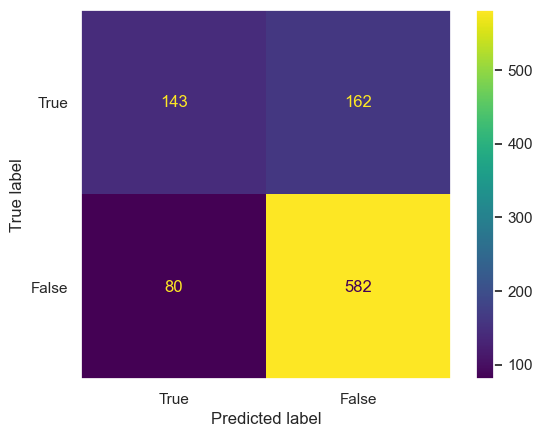

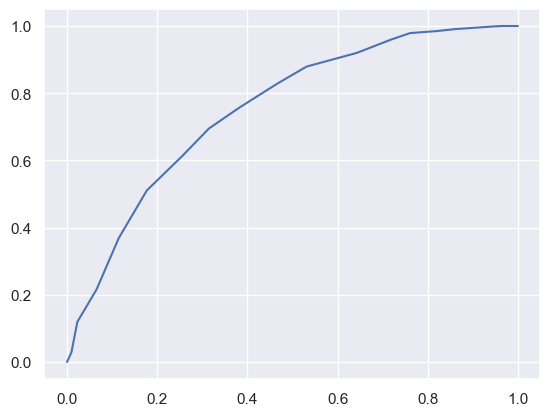

In [24]:
# Train the model using hyperparameter
KNN = KNeighborsClassifier(metric='manhattan', n_neighbors=19)
KNN.fit(X_train,y_train)
y_pred_KNN = KNN.predict(X_test.values)
y_pred_KNN


########### metrices ###############3

acc_KNN = round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN = round(f1_score(y_test, y_pred_KNN),2)
recall_KNN = round(recall_score(y_test,y_pred_KNN),2)
precision_KNN = round(precision_score(y_test,y_pred_KNN),2)

print("accuracy is: ",acc_KNN)
print("F1 is: ",f1_KNN)
print("Precision is: ",recall_KNN)
print("Recall is: ",precision_KNN)
print(classification_report(y_test,y_pred_KNN))


######## confusion Matrix

cmt = confusion_matrix(y_test,y_pred_KNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cmt, display_labels=[True, False])
disp.plot()
plt.grid(False)
plt.show()


### ROC AUC Curve #############33
y_pred_KNN_prob = KNN.predict_proba(X_test.values)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_KNN_prob)
plt.plot(fpr, tpr)